In [2]:
import pandas as pd

In [3]:
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['source'] = 'train'
test['source'] = 'test'
HARD = pd.concat([train, test], sort=False,ignore_index=True )

In [5]:
HARD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to source
dtypes: float64(561), int64(1), object(2)
memory usage: 44.3+ MB


In [6]:
# HARD.isnull().sum()

In [7]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in HARD.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [8]:
HARD.isna().sum().sum()
HARD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, tBodyAcc-mean()-X to source
dtypes: float64(561), int64(1), object(2)
memory usage: 44.3+ MB


In [9]:
HARD.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [10]:
HARD.select_dtypes(include='object')

,Activity,source
0,STANDING,train
1,STANDING,train
2,STANDING,train
3,STANDING,train
4,STANDING,train
5,STANDING,train
6,STANDING,train
7,STANDING,train
8,STANDING,train
9,STANDING,train


In [11]:
label = HARD['Activity'].value_counts()

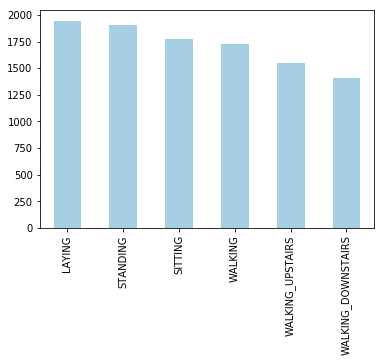

In [12]:
label.plot(kind='bar', colormap = 'Paired')

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(HARD['Activity'], order = HARD['Activity'].value_counts().index)

In [ ]:
# Duplicating datasets
hard_copy = HARD.copy()

In [ ]:
source_data = hard_copy.pop('source')

In [ ]:
hard_copy

In [ ]:
# subject_data = hard_copy.pop('subject')
activity_data = hard_copy.pop('Activity')

In [ ]:
hard_copy

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
scl = StandardScaler()

In [ ]:
hard_copy